In [2]:
from IPython.display import Image

## dataset

- 52k instruction dataset 
    - https://github.com/tatsu-lab/stanford_alpaca#data-release
    - generated following the method described in the Self-Instruct paper 
    - 49,759 training examples  & 2000 validation examples. 
- 需要注意的是，
    - input 可以为空，如下图所列的 4 个 input 都是空的，instruction 足以描述一个问题；
    - 一般而言，instruction 描述的是一个类型的问题，而非一个具体的问题；
        - 除了这里的 （user）instruction，对于 chatgpt（3.5以及4）还会有 system instruction（即 system prompt）

We used the following prompts for fine-tuning the Alpaca model:

- for examples with a **non-empty input** field:

    ```
    Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

    ### Instruction:
    {instruction}

    ### Input:
    {input}

    ### Response:
    ```
- for examples with an **empty input** field:

    ```
    Below is an instruction that describes a task. Write a response that appropriately completes the request.

    ### Instruction:
    {instruction}

    ### Response:
    ```

During **inference** (eg for the web demo), we use the user instruction with an empty input field (second option).


```
def generate_prompt(instruction, input=None):
    if input:
        return f"""Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Input:
{input}

### Response:"""
    else:
        return f"""Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Response:"""
```

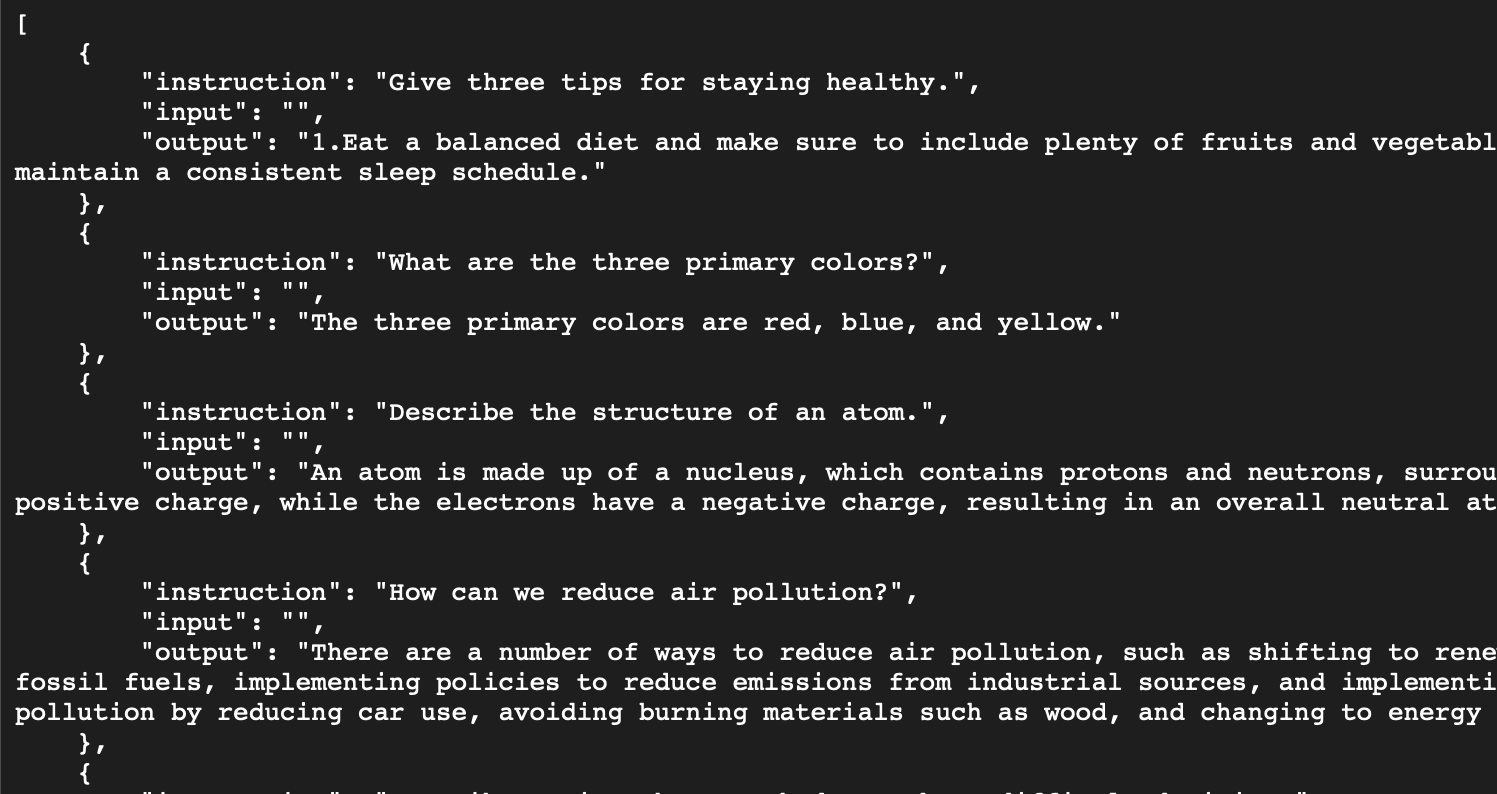

In [5]:
Image('../imgs/alpaca-instruct.png', width=600)

## self instruct

- self instruct
    - https://arxiv.org/abs/2212.10560: Self-Instruct: Aligning Language Model with Self Generated Instructions
- 数据集的 generated 过程
    - Seed task pool with a set of human-written instructions (175 in this case) and sample instructions
    - Use a pretrained LLM (like GPT-3) to determine the task category
    - Given the new instruction, let a pretrained LLM generate the response
    - Collect, prune, and filter the responses before adding it to the task pool

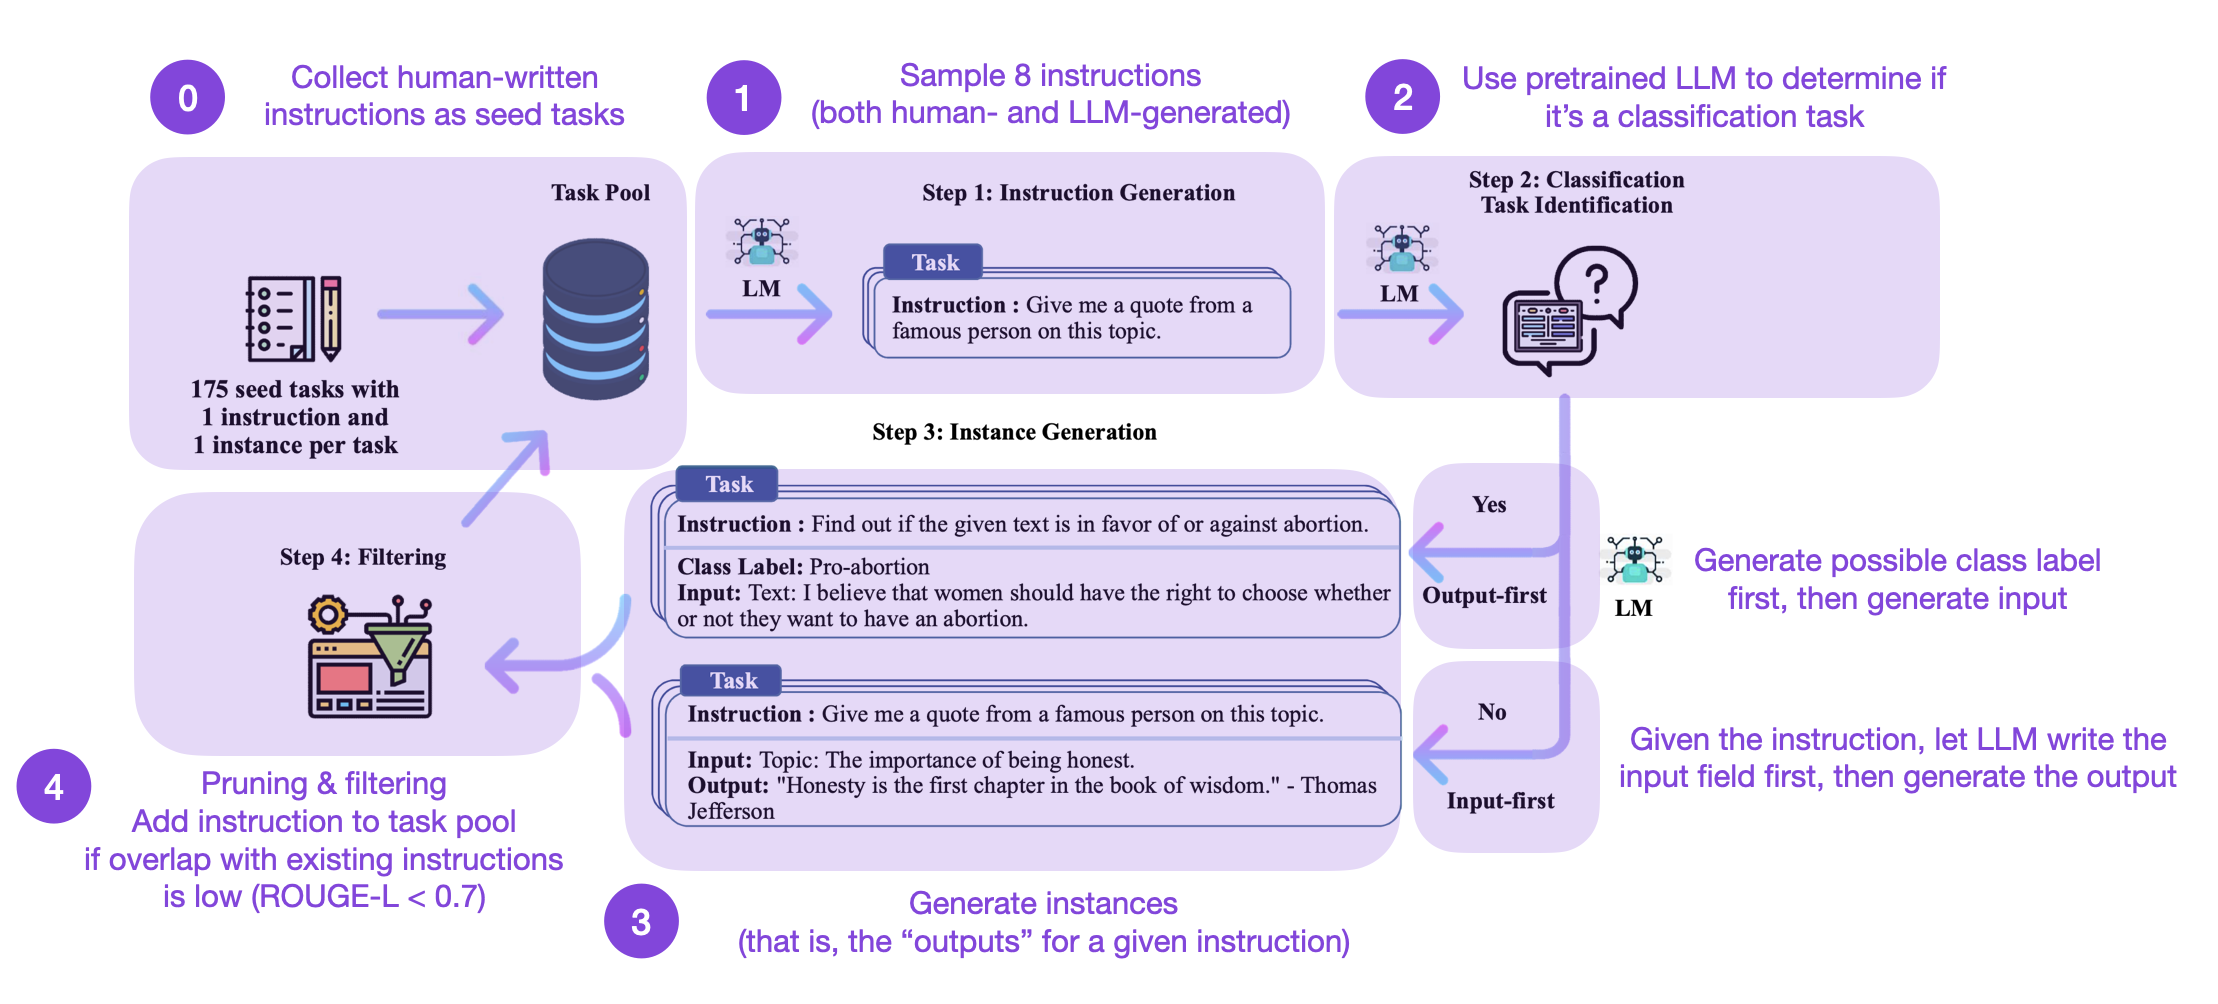

In [6]:
Image('../imgs/self-instruct.png')